In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
%matplotlib inline

In [ ]:
data = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
data.SalePrice = np.log1p(data.SalePrice)
y = data.SalePrice



In [ ]:
data = data.drop('SalePrice', axis=1)
data = pd.concat([data, test_df], axis=0)
data = data.drop('Id', axis=1)

print(data)

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1454         160       RM         21.0     1936   Pave   NaN      Reg   
1455         160       RM         21.0     1894   Pave   NaN      Reg   
1456          20       RL        160.0    20000   Pave   NaN      Reg   
1457          85       RL         62.0    10441   Pave   NaN      Reg   
1458          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub    Inside  ...  

In [ ]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008


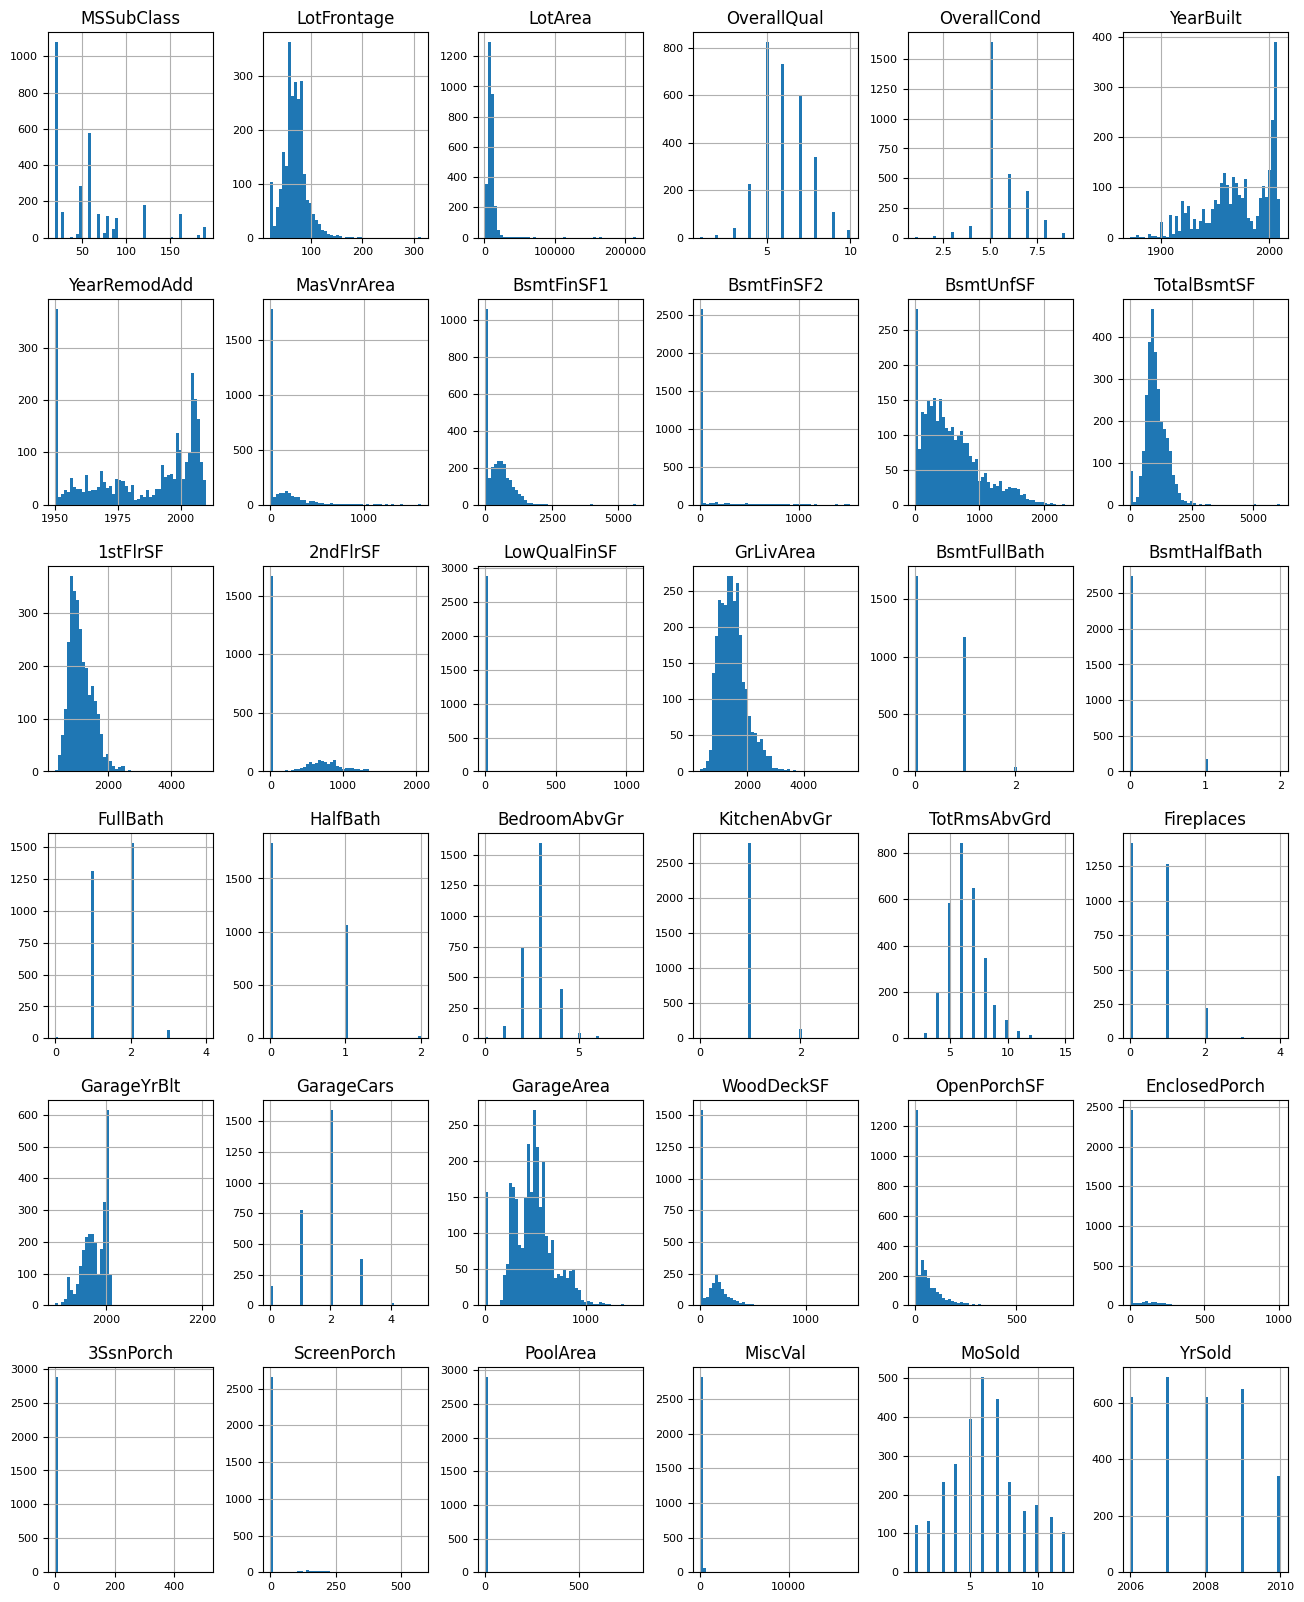

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


In [ ]:
data.loc[:, "Alley"] = data.loc[:, "Alley"].fillna("None")
data.loc[:, "BedroomAbvGr"] = data.loc[:, "BedroomAbvGr"].fillna(0)
data.loc[:, "BsmtQual"] = data.loc[:, "BsmtQual"].fillna("No")
data.loc[:, "BsmtCond"] = data.loc[:, "BsmtCond"].fillna("No")
data.loc[:, "BsmtExposure"] = data.loc[:, "BsmtExposure"].fillna("No")
data.loc[:, "BsmtFinType1"] = data.loc[:, "BsmtFinType1"].fillna("No")
data.loc[:, "BsmtFinType2"] = data.loc[:, "BsmtFinType2"].fillna("No")
data.loc[:, "BsmtFullBath"] = data.loc[:, "BsmtFullBath"].fillna(0)
data.loc[:, "BsmtHalfBath"] = data.loc[:, "BsmtHalfBath"].fillna(0)
data.loc[:, "BsmtUnfSF"] = data.loc[:, "BsmtUnfSF"].fillna(0)
data.loc[:, "CentralAir"] = data.loc[:, "CentralAir"].fillna("N")
data.loc[:, "Condition1"] = data.loc[:, "Condition1"].fillna("Norm")
data.loc[:, "Condition2"] = data.loc[:, "Condition2"].fillna("Norm")
data.loc[:, "EnclosedPorch"] = data.loc[:, "EnclosedPorch"].fillna(0)
data.loc[:, "ExterCond"] = data.loc[:, "ExterCond"].fillna("TA")
data.loc[:, "ExterQual"] = data.loc[:, "ExterQual"].fillna("TA")
data.loc[:, "Fence"] = data.loc[:, "Fence"].fillna("No")
data.loc[:, "FireplaceQu"] = data.loc[:, "FireplaceQu"].fillna("No")
data.loc[:, "Fireplaces"] = data.loc[:, "Fireplaces"].fillna(0)
data.loc[:, "Functional"] = data.loc[:, "Functional"].fillna("Typ")
data.loc[:, "GarageType"] = data.loc[:, "GarageType"].fillna("No")
data.loc[:, "GarageFinish"] = data.loc[:, "GarageFinish"].fillna("No")
data.loc[:, "GarageQual"] = data.loc[:, "GarageQual"].fillna("No")
data.loc[:, "GarageCond"] = data.loc[:, "GarageCond"].fillna("No")
data.loc[:, "GarageArea"] = data.loc[:, "GarageArea"].fillna(0)
data.loc[:, "GarageCars"] = data.loc[:, "GarageCars"].fillna(0)
data.loc[:, "HalfBath"] = data.loc[:, "HalfBath"].fillna(0)
data.loc[:, "HeatingQC"] = data.loc[:, "HeatingQC"].fillna("TA")
data.loc[:, "KitchenAbvGr"] = data.loc[:, "KitchenAbvGr"].fillna(0)
data.loc[:, "KitchenQual"] = data.loc[:, "KitchenQual"].fillna("TA")
data.loc[:, "LotFrontage"] = data.loc[:, "LotFrontage"].fillna(0)
data.loc[:, "LotShape"] = data.loc[:, "LotShape"].fillna("Reg")
data.loc[:, "MasVnrType"] = data.loc[:, "MasVnrType"].fillna("None")
data.loc[:, "MasVnrArea"] = data.loc[:, "MasVnrArea"].fillna(0)
data.loc[:, "MiscFeature"] = data.loc[:, "MiscFeature"].fillna("No")
data.loc[:, "MiscVal"] = data.loc[:, "MiscVal"].fillna(0)
data.loc[:, "OpenPorchSF"] = data.loc[:, "OpenPorchSF"].fillna(0)
data.loc[:, "PavedDrive"] = data.loc[:, "PavedDrive"].fillna("N")
data.loc[:, "PoolQC"] = data.loc[:, "PoolQC"].fillna("No")
data.loc[:, "PoolArea"] = data.loc[:, "PoolArea"].fillna(0)
data.loc[:, "SaleCondition"] = data.loc[:, "SaleCondition"].fillna("Normal")
data.loc[:, "ScreenPorch"] = data.loc[:, "ScreenPorch"].fillna(0)
data.loc[:, "TotRmsAbvGrd"] = data.loc[:, "TotRmsAbvGrd"].fillna(0)
data.loc[:, "Utilities"] = data.loc[:, "Utilities"].fillna("AllPub")
data.loc[:, "WoodDeckSF"] = data.loc[:, "WoodDeckSF"].fillna(0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [ ]:
data = data.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45",
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75",
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120",
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [ ]:
data = data.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5,
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

<ipython-input-99-bf1f4c9c1cd2>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},


In [ ]:
numerical_features = data.select_dtypes(exclude = ["object"]).columns
categorical_features = data.select_dtypes(include = ["object"]).columns

train_num = data[numerical_features]
train_cat = data[categorical_features]

train_num.isnull().values.sum()
train_num = train_num.fillna(train_num.median())
train_num.isnull().values.sum()


train_cat = pd.get_dummies(train_cat)
# print(train_cat)


In [ ]:
all_data = pd.concat([train_num, train_cat], axis = 1)
train_data = all_data.iloc[:1460, :]
test_data = all_data.iloc[1460:, :]

print(train_data)

      LotFrontage  LotArea  Street  LotShape  Utilities  LandSlope  \
0            65.0     8450       2         4          4          3   
1            80.0     9600       2         4          4          3   
2            68.0    11250       2         3          4          3   
3            60.0     9550       2         3          4          3   
4            84.0    14260       2         3          4          3   
...           ...      ...     ...       ...        ...        ...   
1455         62.0     7917       2         4          4          3   
1456         85.0    13175       2         4          4          3   
1457         66.0     9042       2         4          4          3   
1458         68.0     9717       2         4          4          3   
1459         75.0     9937       2         4          4          3   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd  ...  SaleType_ConLw  \
0               7            5       2003          2003  ...           False   

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size = 0.3, random_state = 0)
print(y)

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64


In [ ]:
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)




In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print("RMSE on Training set :", rmse_cv_train(lr).mean())

RMSE on Training set : 0.1372402696502514


In [ ]:
prediction = lr.predict(test_data)

In [ ]:
prediction = np.expm1(prediction)
prediction

array([116810.24191632, 181128.61485208, 176598.03578098, ...,
       163401.43482036, 116194.48511366, 201967.67050169])

In [ ]:
submission = pd.DataFrame({
    "Id" : test_df["Id"],
    "SalePrice": prediction
})
submission.to_csv("submission_linear.csv", index=False)

#Ridge pridiction

In [ ]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85,
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_

Best alpha : 10.0
Try again for more precision with alphas centered around 10.0


In [ ]:
prediction = ridge.predict(test_data)

In [ ]:
prediction = np.expm1(prediction)
prediction

array([114930.23685508, 163604.48753501, 174784.03598642, ...,
       162900.64183257, 113044.23317181, 211004.69611439])

In [ ]:
submission = pd.DataFrame({
    "Id" : test_df["Id"],
    "SalePrice": prediction
})
submission.to_csv("submission_ridge.csv", index=False)

#LASSO Regulization

In [ ]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1,
                          0.3, 0.6, 1],
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8,
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05,
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35,
                          alpha * 1.4],
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_

Best alpha : 0.0006
Try again for more precision with alphas centered around 0.0006


In [ ]:
prediction = ridge.predict(test_data)

In [ ]:
prediction = np.expm1(prediction)
prediction

array([114930.23685508, 163604.48753501, 174784.03598642, ...,
       162900.64183257, 113044.23317181, 211004.69611439])

In [ ]:
submission = pd.DataFrame({
    "Id" : test_df["Id"],
    "SalePrice": prediction
})
submission.to_csv("submission_lasso.csv", index = False)